# 编程环境

使用的编程环境是：python3+opencv3

python3可以直接安装anaconda，安装后在命令行处执行`conda install -c https://conda.binstar.org/menpo opencv3`安装opencv3即可配置完所有开发环境

# 算法步骤

1. 将彩色图片转化为灰度图片
2. 中值滤波去除背景噪点
3. canny算子进行边缘检测
4. hough变换检测圆
5. 可视化检测结果与输出

# 使用说明

1. 核心函数是`getCircle`，该函数输入一个变量即可，输入变量是图像文件的位置，输出的是圆心的坐标。同时该函数还进行了图像处理的可视化。
2. 不同的图像需要有不同的预处理参数，尤其在更换背景的情况下。
3. 保守情况下，该算法适用于该场景以及类似大小的圆形物体识别，其他场景需要测试。
4. 检测的图像最好是接近圆形，这就需要拍照的时候最好从图像正上方拍而不要斜着拍，否则会产生一定的误差。

# 核心代码

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def getCircle(file,zero_point = [0,0]):
    #预处理
    zero_point = np.array(zero_point)
    
    img = plt.imread(file) #读入数据
    #设置虚拟图像
    virtual_img =  np.ones(img.shape,dtype=np.uint8)*255
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#灰度图像 
    blur = cv2.medianBlur(gray,25) #中值滤波

    #canny算子边缘检测
    edges = cv2.Canny(blur,50,100)

    #hough检测圆
    circles1 = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,100,param1=100,param2=30,minRadius=300,maxRadius=470)

    #hough transform
    circles = circles1[0,:,:]#提取为二维
    circles = np.uint16(np.around(circles))#四舍五入，取整
    print ('检测出来%d个圆' % (len(circles1)))
    #print ('圆心的位置是',circles[0,:2])
    print ('圆心的位置是',(circles[0,:2]).astype(np.float16)-zero_point)
    for i in circles[:]: 
        cv2.circle(virtual_img,(i[0],i[1]),i[2],(255,0,0),thickness=40,lineType=4)#画圆
        cv2.circle(virtual_img,(i[0],i[1]),2,(255,0,0),thickness=20,lineType=4)#画圆心
    f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1,figsize=(20,20))
    ax1.imshow(gray,'gray'),plt.setp(ax1, xticks=[], yticks=[])
    ax2.imshow(blur,'gray'),plt.setp(ax2, xticks=[], yticks=[])
    ax3.imshow(edges,'gray'),plt.setp(ax3, xticks=[], yticks=[])
    ax4.imshow(virtual_img),plt.setp(ax4, xticks=[], yticks=[])
    return circles[0,:2]

def get2Circles(file1,file2,zero_point = [0,0]):
    #预处理
    zero_point = np.array(zero_point)
    
    img1 = plt.imread(file1) #读入数据
    #设置虚拟图像
    virtual_img = np.zeros(img.shape,dtype=np.uint8)
    
    gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)#灰度图像 
    blur1 = cv2.medianBlur(gray1,25) #中值滤波
    #canny算子边缘检测
    edges1 = cv2.Canny(blur1,50,100)
    #hough检测圆
    circles1 = cv2.HoughCircles(edges1,cv2.HOUGH_GRADIENT,1,100,param1=100,param2=30,minRadius=300,maxRadius=470)
    #hough transform
    circles = circles1[0,:,:]#提取为二维
    circles = np.uint16(np.around(circles))#四舍五入，取整
    center1 = circles[0,:2]
    #print ('检测出来%d个圆' % (len(circles1)))
    #print ('第一个圆心的位置是',center1)
    print ('第一个圆心的位置是',(center1).astype(np.float16)-zero_point)
    for i in circles[:]: 
        cv2.circle(virtual_img,(i[0],i[1]),i[2],(255,0,0),thickness=40,lineType=4)#画圆
        cv2.circle(virtual_img,(i[0],i[1]),2,(255,0,0),thickness=20,lineType=4)#画圆心
    
    #file2    
    img2 = plt.imread(file2) #读入数据
    gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)#灰度图像 
    blur2 = cv2.medianBlur(gray2,25) #中值滤波
    #canny算子边缘检测
    edges2 = cv2.Canny(blur2,50,100)
    #hough检测圆
    circles1 = cv2.HoughCircles(edges2,cv2.HOUGH_GRADIENT,1,100,param1=100,param2=30,minRadius=300,maxRadius=470)
    #hough transform
    circles = circles1[0,:,:]#提取为二维
    circles = np.uint16(np.around(circles))#四舍五入，取整
    center2 = circles[0,:2]
    #print ('检测出来%d个圆' % (len(circles1)))
    print ('第一个圆心的位置是',(center2).astype(np.float16)-zero_point)
    for i in circles[:]: 
        cv2.circle(virtual_img,(i[0],i[1]),i[2],(255,0,0),thickness=40,lineType=4)#画圆
        cv2.circle(virtual_img,(i[0],i[1]),2,(255,0,0),thickness=20,lineType=4)#画圆心
       
    print('圆心的位置从',(center1).astype(np.float16)-zero_point,'移动到了',(center2).astype(np.float16)-zero_point)
    print('圆心向右移动的像素是',(center2.astype(np.float16)-center1.astype(np.float16))[0])
    print('圆心向下移动的像素是',(center2.astype(np.float16)-center1.astype(np.float16))[1])

    # plot
    f, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2,figsize=(20,20))
    ax1.imshow(img1,)
    ax2.imshow(img2,),
    ax3.imshow(edges1,'gray')
    ax4.imshow(edges2,'gray')
    ax5.imshow(virtual_img,)

# 示例

## 两张图片

第一个圆心的位置是 [ 2238.  1548.]
第一个圆心的位置是 [ 2224.  1526.]
圆心的位置从 [ 2238.  1548.] 移动到了 [ 2224.  1526.]
圆心向右移动的像素是 -14.0
圆心向下移动的像素是 -22.0


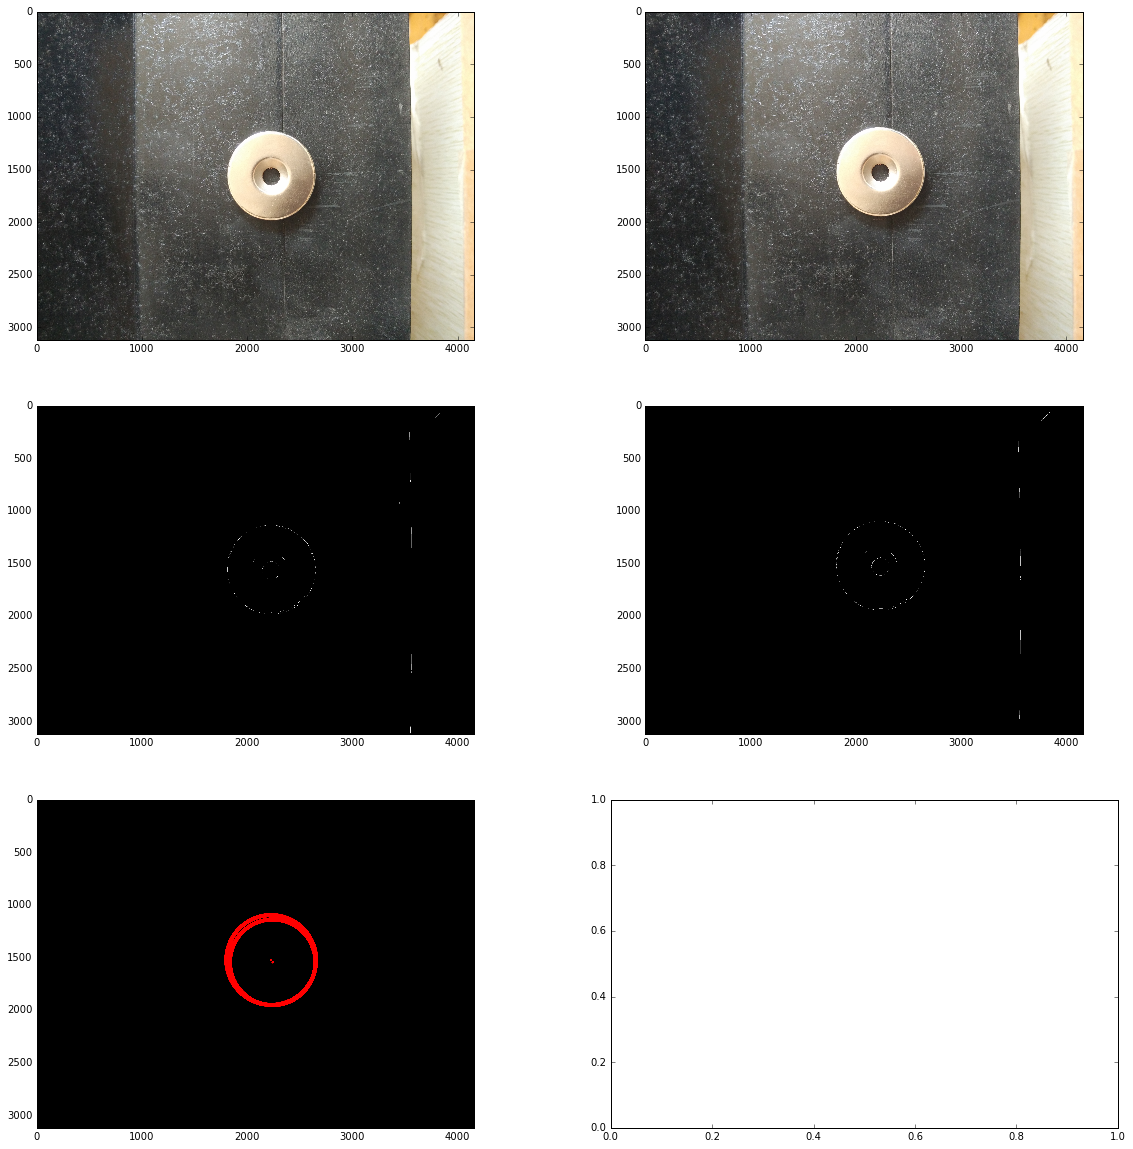

In [50]:
get2Circles('0530_5.jpg','0530_6.jpg',zero_point = [0,0])

第一个圆心的位置是 [  940.  1473.]
第一个圆心的位置是 [  938.  1439.]
圆心的位置从 [  940.  1473.] 移动到了 [  938.  1439.]
圆心向右移动的像素是 -2.0
圆心向下移动的像素是 -34.0


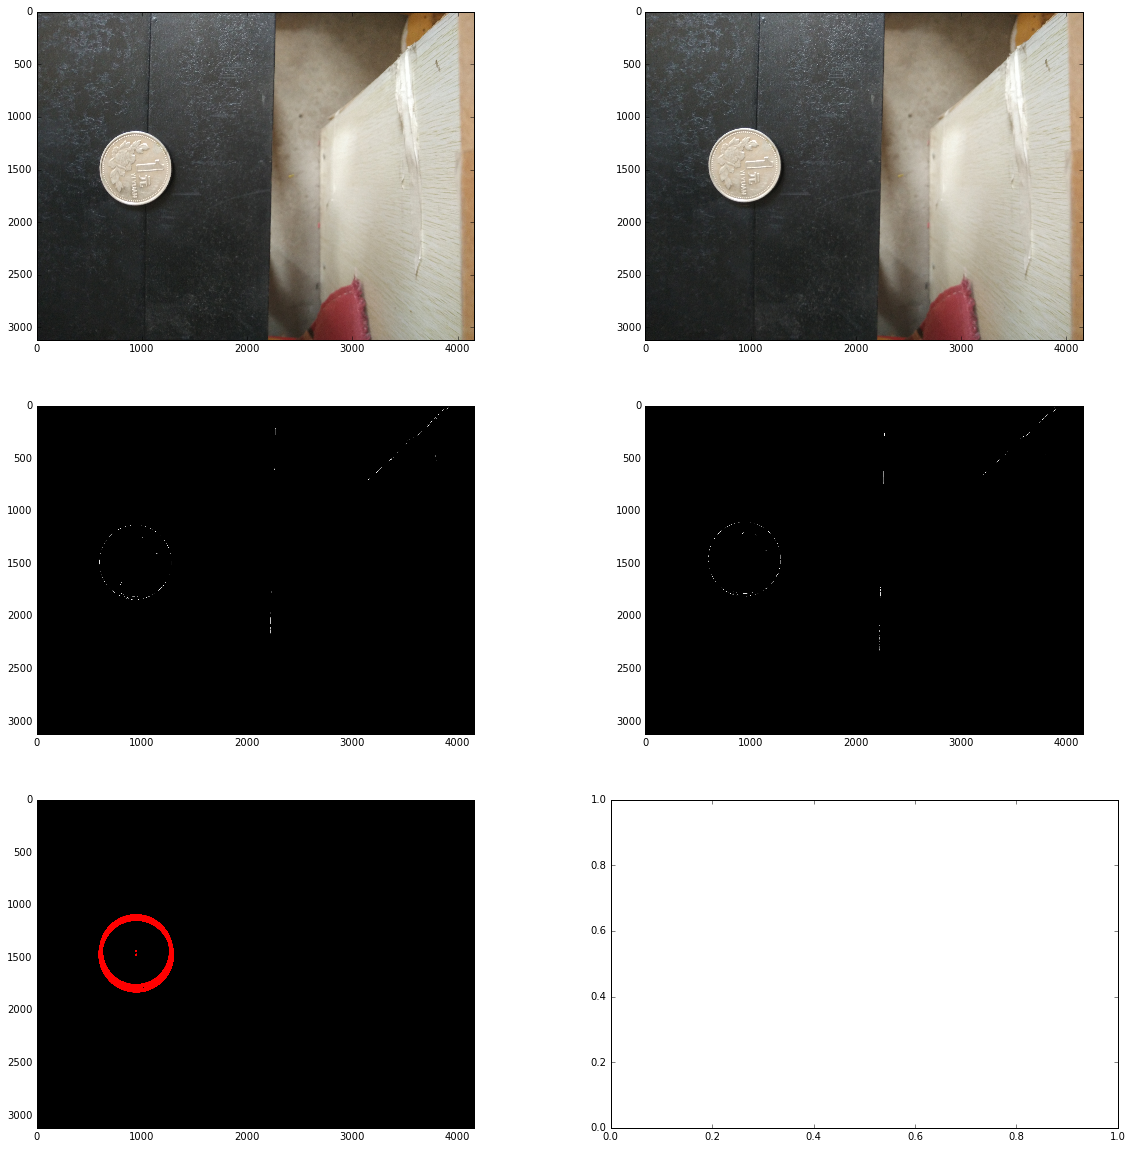

In [51]:
get2Circles('0530_7.jpg','0530_8.jpg',zero_point = [2,3])

## 单个图片

检测出来1个圆
圆心的位置是 [ 2236.  1545.]


array([2238, 1548], dtype=uint16)

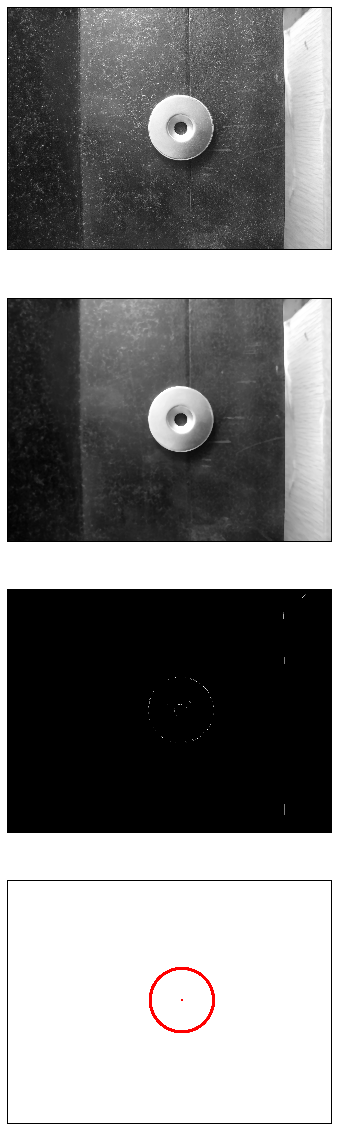

In [2]:
getCircle('0530_5.jpg',zero_point = [2,3])

检测出来1个圆
圆心的位置是 [ 2224.  1526.]


array([2224, 1526], dtype=uint16)

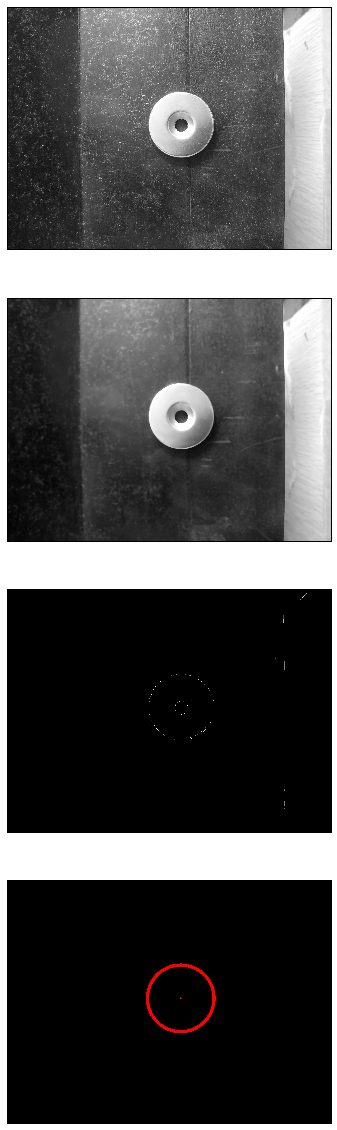

In [45]:
getCircle('0530_6.jpg',zero_point = [0,0])

检测出来1个圆
圆心的位置是 [  942.  1476.]


array([ 942, 1476], dtype=uint16)

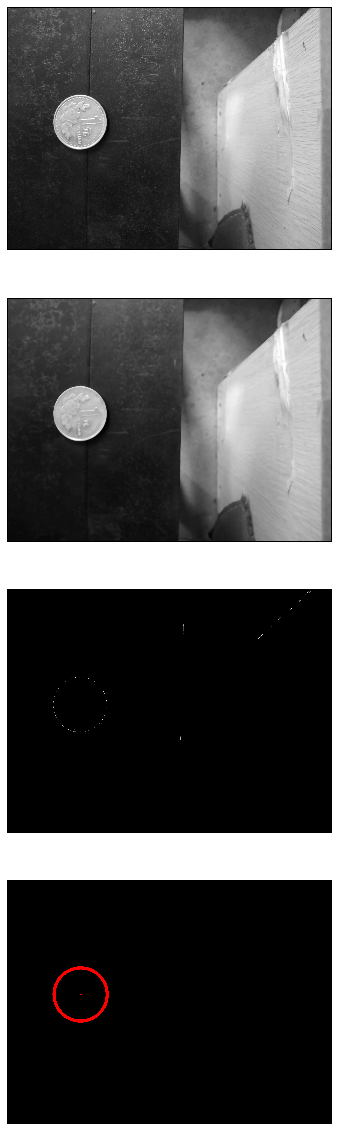

In [46]:
getCircle('0530_7.jpg',zero_point = [0,0])

检测出来1个圆
圆心的位置是 [  940.  1442.]


array([ 940, 1442], dtype=uint16)

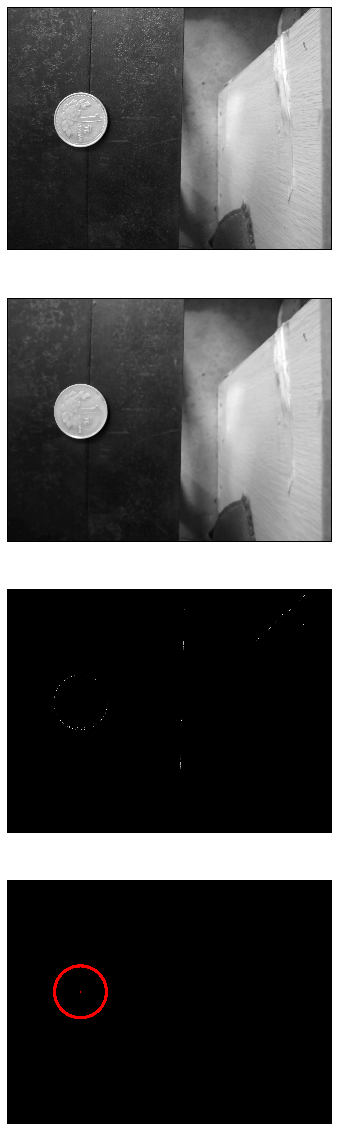

In [47]:
getCircle('0530_8.jpg',zero_point = [0,0])